In [1]:
pip install yahoo_finance_api2

  Created wheel for yahoo-finance-api2: filename=yahoo_finance_api2-0.0.11-py3-none-any.whl size=3706 sha256=d87a7b83845ba988f49c83239959ab83b6dfde8923c106378612fb4d266e72b5
  Stored in directory: /home/jovyan/.cache/pip/wheels/b8/96/db/ae520a2e7b6436637a2c88af5da05bb259cf698eada1537c98
Successfully built yahoo-finance-api2
Note: you may need to restart the kernel to use updated packages.


In [2]:
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime
now = datetime.datetime.now()
now = now.strftime("%y%m%d")

In [14]:
def main():
    num = len(data_dict)
    #fig, ax = plt.subplots(num, 1, figsize=(16, 3*num))
    fig, ax = plt.subplots(figsize=(10, 6))
    legend_list = []
    i = 0
    for mykey, company_name in data_dict.items():
        company_code = str(mykey) + '.T'
        my_share = share.Share(company_code)
        
        try:
            # 1日毎の1年分のデータを取得する場合
            symbol_data = my_share.get_historical(share.PERIOD_TYPE_YEAR,
                                                  1,
                                                  share.FREQUENCY_TYPE_DAY,
                                                  1)
            # 5分毎の10日分のデータを取得する場合
            '''
            symbol_data = my_share.get_historical(share.PERIOD_TYPE_DAY,
                                                  10,
                                                  share.FREQUENCY_TYPE_MINUTE,
                                                  5)
            '''
            df = pd.DataFrame(symbol_data.values(), index=symbol_data.keys()).T
            df.timestamp = pd.to_datetime(df.timestamp, unit='ms')
            # 日本標準時間に変換
            df.index = pd.DatetimeIndex(df.timestamp, name='timestamp').tz_localize('UTC').tz_convert('Asia/Tokyo')
            # csvファイルに保存
            df.to_csv(now + "_" + str(mykey) + "_" + company_name + ".csv", index=False)
            #ax[i].set_title( "{0} ({1})".format(company_name, mykey))
            ax.plot(df.index, df.close)
            ax.grid(True)
            ax.set_ylabel("Stock Price [Yen]")
            #ax[i].label_outer() 一番外側のラベルのみ表示
            legend_list.append(str(mykey) + " " + company_name)
            if i == (num - 1):
                ax.set_xlabel("Date")
        except YahooFinanceError as e:
            print(e.message)
            pass
        i += 1
    ax.legend(labels= legend_list,
              bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
              borderaxespad=0.,
              ncol=1,
              mode="expand",
              title="Company")
    plt.rcParams['font.size'] = 18 # ラベルやタイトルなど全フォントのデフォルトサイズ
    plt.subplots_adjust(right=0.7)
    plt.tight_layout() # ラベルレイアウトを調整する。文字がはみ出ないようにする。
    plt.show()
#     fig_name = now + "_stock_price.png"
#     plt.savefig(fig_name)

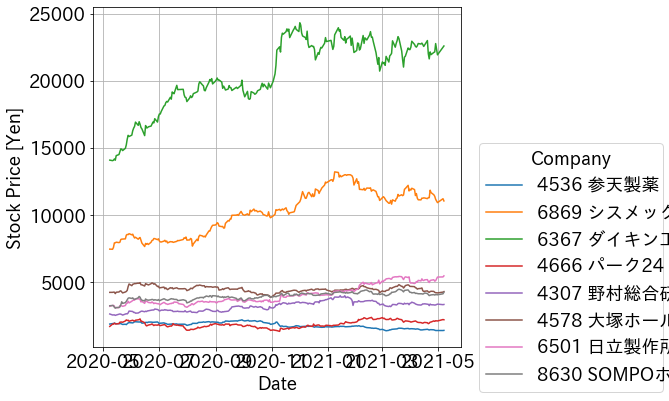

In [9]:
if __name__ == '__main__':
    data_dict = {
        4536:"参天製薬",
        6869:"シスメックス",
        6367:"ダイキン工業",
        4666:"パーク24",
        4307:"野村総合研究所",
        4578:"大塚ホールディングス",
        6501:"日立製作所",
        8630:"SOMPOホールディングス"
    }
#     data_dict = {
#         5333:"日本ガイシ",
#         6752:"パナソニック",
#         3402:"東レ",
#         7358:"ポピンズホールディングス",
#         7732:"トプコン",
#         5802:"住友電気工業",
#         6594:"日本電産",
#         5332:"TOTO",
#         4005:"住友化学",
#     }
#     data_dict = {
#         3902:"MDV",
#         4888:"ステラ",
#         5020:"ENEOS",
#         5802:"住電",
#         6070:"キャリアリンク",
#         7085:"カーブス",
#         9001:"東武",
#         9474:"ゼンリン",
#         9475:"昭文社"
#     }
#     data_dict = { 7201:'日産自動車',
#                   7202:'いすゞ自動車',
#                   7203:'トヨタ自動車',
#                   7205:'日野自動車',
#                   7211:'三菱自動車工業',
#                   7261:'マツダ',
#                   7267:'本田技研工業',
#                   7269:'スズキ',
#                   7270:'SUBARU',
#                   7272:'ヤマハ発動機',
#                   6902:'デンソー'}
    main()

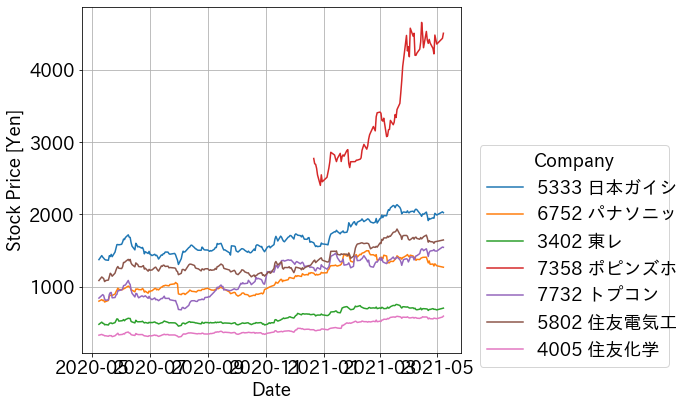

In [15]:
if __name__ == '__main__':
    data_dict = {
        5333:"日本ガイシ",
        6752:"パナソニック",
        3402:"東レ",
        7358:"ポピンズホールディングス",
        7732:"トプコン",
        5802:"住友電気工業",
#         6594:"日本電産",
#         5332:"TOTO",
        4005:"住友化学",
    }
    main()

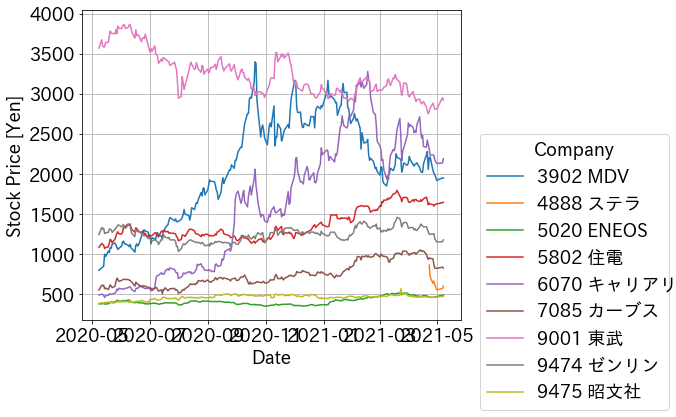

In [13]:
if __name__ == '__main__':
    data_dict = {
            3902:"MDV",
            4888:"ステラ",
            5020:"ENEOS",
            5802:"住電",
            6070:"キャリアリンク",
            7085:"カーブス",
            9001:"東武",
            9474:"ゼンリン",
            9475:"昭文社"
        }
    main()
